 # Salary generation

## 1. Load salary data
Source: https://statbel.fgov.be/fr/themes/emploi-formation/salaires-et-cout-de-la-main-doeuvre/salaires-mensuels-bruts-moyens#figures

In [1]:
data <- read.csv("../datasets/repartition_salaire.csv", header=TRUE)
data_sorted <- data[order(data$Total), ]

## 2. Plot salary data

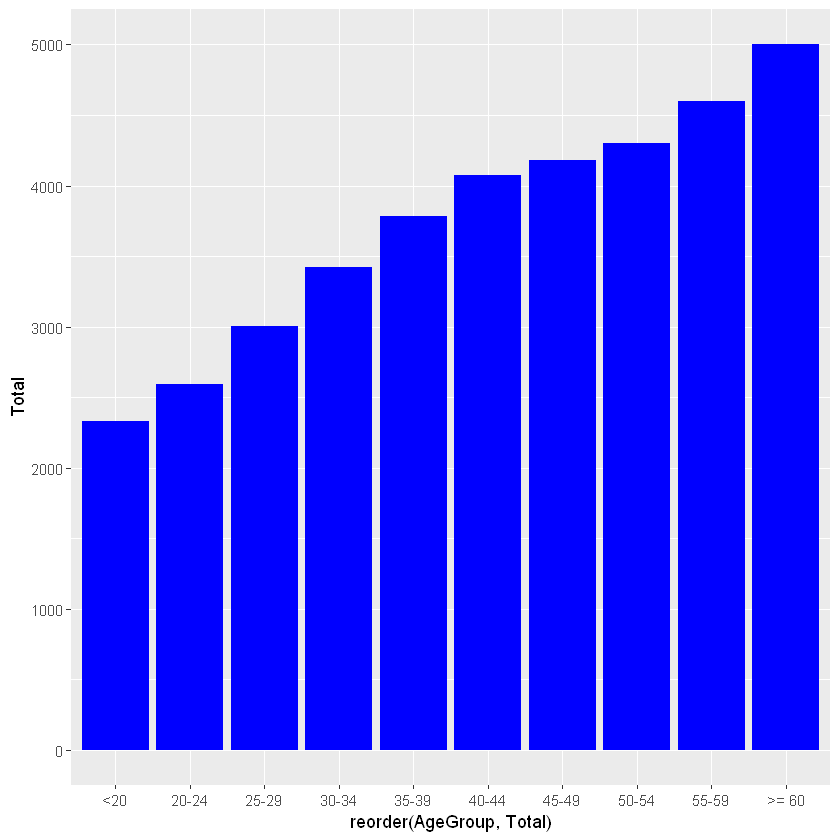

In [2]:
library(ggplot2)

ggplot(data_sorted, aes(x = reorder(AgeGroup, Total), y = Total)) + geom_bar(stat="identity", fill="blue")

## 3. Salary generation

In [3]:
bounds <- c(0, 20, 24, 29, 34, 39, 44, 49, 54, 59, Inf)

generate_salary <- function(age) {
  age_group <- cut(age, breaks = bounds, labels = data$AgeGroup)
  age_group <- subset(data, AgeGroup == age_group)
  generated_salary <-  round(rnorm(1, mean = age_group$Total, sd = 400))
  return(generated_salary)
}

## 4. Generate new salaries

In [4]:
temp_data <- read.csv("../workingsets/temp_age_gender_status.csv", header=TRUE)

age <- as.numeric(temp_data$age)

new_salaries <- lapply(seq_len(length(age)), function(i) {
  generate_salary(age[i])
})

In [5]:
new_ages_genders_statuses <- data.frame(age = temp_data$age, gender = temp_data$gender, status = temp_data$status, salary = unlist(new_salaries))
write.csv(new_ages_genders_statuses, file = "../workingsets/temp_age_gender_status_salary.csv")